# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [63]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        date_time = pd.to_datetime(city_weather['dt'], unit='s')
        city_date = date_time.date()

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | saint croix
Processing Record 4 of Set 1 | saipan
Processing Record 5 of Set 1 | fonadhoo
City not found. Skipping...
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | port blair
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | nuku'alofa
Processing Record 13 of Set 1 | veraval
Processing Record 14 of Set 1 | ankang
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | valle hermoso
Processing Record 18 of Set 1 | palmer
Processing Record 19 of Set 1 | bontang
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | mili
Processing Record 22

Processing Record 42 of Set 4 | nelson bay
Processing Record 43 of Set 4 | tralee
Processing Record 44 of Set 4 | inhambane
Processing Record 45 of Set 4 | west island
Processing Record 46 of Set 4 | al ghayzah
Processing Record 47 of Set 4 | phang nga
Processing Record 48 of Set 4 | hodmezovasarhely
Processing Record 49 of Set 4 | ancud
Processing Record 0 of Set 5 | belidzhi
Processing Record 1 of Set 5 | byron bay
Processing Record 2 of Set 5 | palikir - national government center
Processing Record 3 of Set 5 | ishinomaki
Processing Record 4 of Set 5 | geraldton
Processing Record 5 of Set 5 | san mariano
Processing Record 6 of Set 5 | cargados carajos
City not found. Skipping...
Processing Record 7 of Set 5 | okha
Processing Record 8 of Set 5 | sicuani
Processing Record 9 of Set 5 | lloydminster
Processing Record 10 of Set 5 | balkanabat
Processing Record 11 of Set 5 | tecolotlan
Processing Record 12 of Set 5 | napier
Processing Record 13 of Set 5 | novodvinsk
Processing Record 14 o

Processing Record 30 of Set 8 | ghanzi
Processing Record 31 of Set 8 | yemetsk
Processing Record 32 of Set 8 | fort st. john
Processing Record 33 of Set 8 | bayganin
Processing Record 34 of Set 8 | tsiombe
Processing Record 35 of Set 8 | tuyen quang
Processing Record 36 of Set 8 | vedaraniyam
Processing Record 37 of Set 8 | vila franca do campo
Processing Record 38 of Set 8 | astoria
Processing Record 39 of Set 8 | chernyshevskiy
Processing Record 40 of Set 8 | beberibe
Processing Record 41 of Set 8 | chibougamau
Processing Record 42 of Set 8 | mount gambier
Processing Record 43 of Set 8 | morondava
Processing Record 44 of Set 8 | we
City not found. Skipping...
Processing Record 45 of Set 8 | mersa matruh
Processing Record 46 of Set 8 | nagothana
Processing Record 47 of Set 8 | kingaroy
Processing Record 48 of Set 8 | seaside
Processing Record 49 of Set 8 | dowa
Processing Record 0 of Set 9 | kailua-kona
Processing Record 1 of Set 9 | mejit
Processing Record 2 of Set 9 | watsa
Processi

Processing Record 23 of Set 12 | sishilichengzi
City not found. Skipping...
Processing Record 24 of Set 12 | cidade velha
Processing Record 25 of Set 12 | cam ranh
Processing Record 26 of Set 12 | tevragh zeina
City not found. Skipping...
Processing Record 27 of Set 12 | sao joao da barra
Processing Record 28 of Set 12 | toamasina
Processing Record 29 of Set 12 | montmagny
Processing Record 30 of Set 12 | vilyuysk
Processing Record 31 of Set 12 | colonia
Processing Record 32 of Set 12 | saudarkrokur
Processing Record 33 of Set 12 | perros-guirec
Processing Record 34 of Set 12 | tabas
Processing Record 35 of Set 12 | salinas
Processing Record 36 of Set 12 | malvan
Processing Record 37 of Set 12 | naze
Processing Record 38 of Set 12 | sandnessjoen
Processing Record 39 of Set 12 | trzebiatow
Processing Record 40 of Set 12 | port glaud
City not found. Skipping...
Processing Record 41 of Set 12 | kununurra
Processing Record 42 of Set 12 | mugia
Processing Record 43 of Set 12 | mahabe
City n

In [64]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [65]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.17,78,61,7.26,GS,2023-12-03
1,lebu,-37.6167,-73.6500,9.68,73,0,8.85,CL,2023-12-03
2,saint croix,17.7397,-64.7388,26.25,78,40,4.63,VI,2023-12-03
3,saipan,15.1355,145.7010,30.39,66,20,8.23,MP,2023-12-03
4,port-aux-francais,-49.3500,70.2167,5.30,90,83,17.61,TF,2023-12-03


In [66]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [67]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.17,78,61,7.26,GS,2023-12-03
1,lebu,-37.6167,-73.6500,9.68,73,0,8.85,CL,2023-12-03
2,saint croix,17.7397,-64.7388,26.25,78,40,4.63,VI,2023-12-03
3,saipan,15.1355,145.7010,30.39,66,20,8.23,MP,2023-12-03
4,port-aux-francais,-49.3500,70.2167,5.30,90,83,17.61,TF,2023-12-03


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

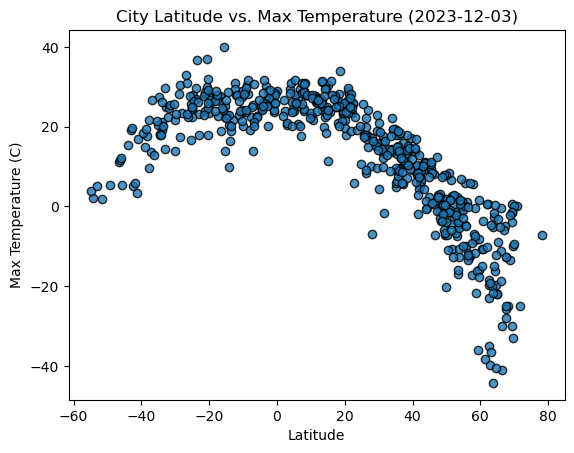

In [84]:
# Build scatter plot for latitude vs. temperature
lat_temp = plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],alpha = 0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-12-03)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

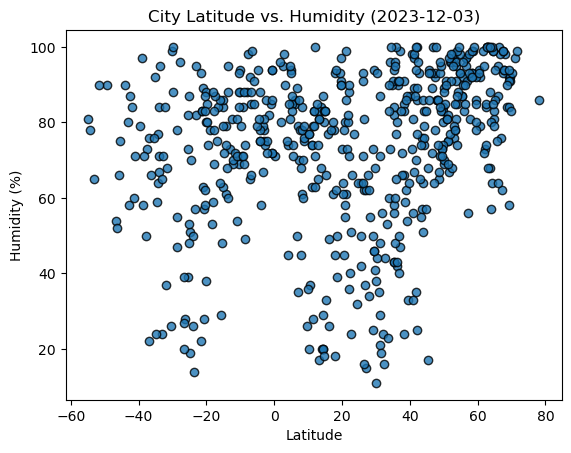

In [85]:
# Build the scatter plots for latitude vs. humidity
lat_humi = plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],alpha = 0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-12-03)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

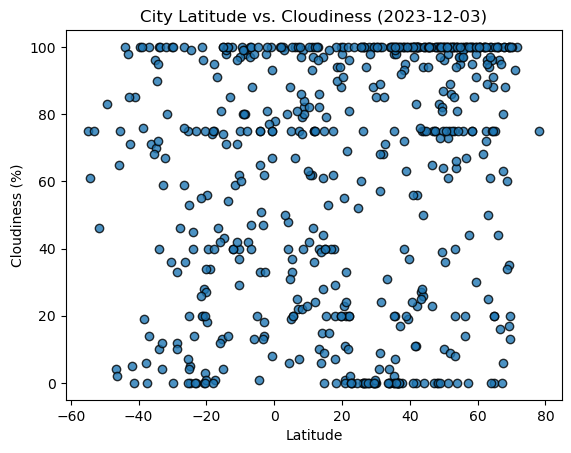

In [86]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud = plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],alpha = 0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-12-03)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

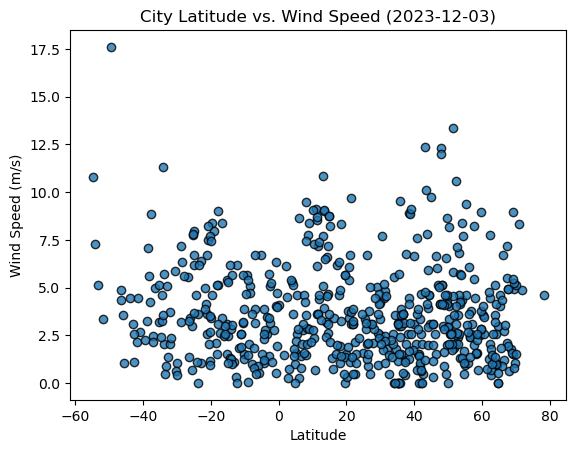

In [87]:
# Build the scatter plots for latitude vs. wind speed
lat_wind = plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],alpha = 0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-12-03)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xy, title='', x_label='', y_label=''):

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(f"The r_value is: {r_value**2}")

    # Create the linear regression line
    regress_values = slope * x + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot the data points
    plt.scatter(x, y)

    # Plot the linear regression line
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, xy=xy,fontsize=15,color="red")

    # Customize the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show the plot
    plt.show()

In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,saint croix,17.7397,-64.7388,26.25,78,40,4.63,VI,2023-12-03
3,saipan,15.1355,145.7010,30.39,66,20,8.23,MP,2023-12-03
7,port blair,11.6667,92.7500,27.02,83,75,3.60,IN,2023-12-03
8,jamestown,42.0970,-79.2353,5.81,100,100,2.57,US,2023-12-03
9,longyearbyen,78.2186,15.6401,-7.09,86,75,4.63,SJ,2023-12-03


In [74]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.17,78,61,7.26,GS,2023-12-03
1,lebu,-37.6167,-73.6500,9.68,73,0,8.85,CL,2023-12-03
4,port-aux-francais,-49.3500,70.2167,5.30,90,83,17.61,TF,2023-12-03
5,uturoa,-16.7333,-151.4333,27.66,75,91,8.38,PF,2023-12-03
6,edinburgh of the seven seas,-37.0676,-12.3116,13.75,76,100,2.47,SH,2023-12-03


###  Temperature vs. Latitude Linear Regression Plot

The r_value is: 0.776847303535541


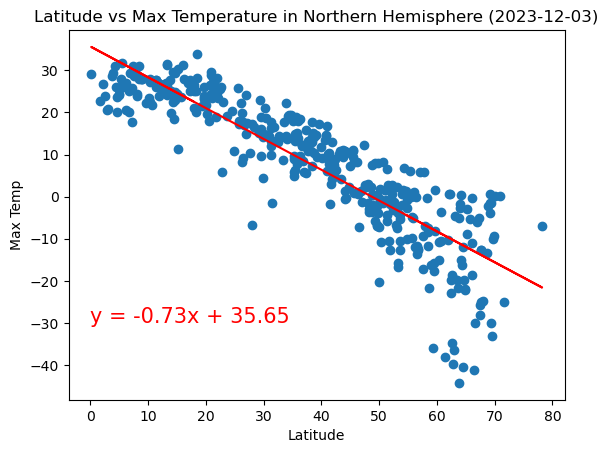

In [89]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], xy=(0,-30),title='Latitude vs Max Temperature in Northern Hemisphere (2023-12-03)', x_label='Latitude', y_label='Max Temp')

The r_value is: 0.35309177084040805


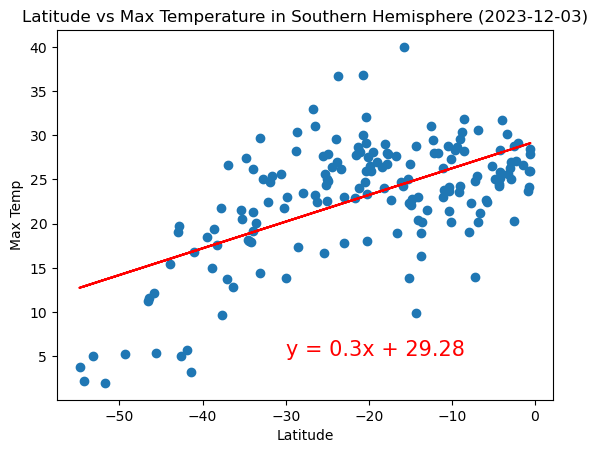

In [90]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], xy=(-30,5),title='Latitude vs Max Temperature in Southern Hemisphere (2023-12-03)', x_label='Latitude', y_label='Max Temp')

**Discussion about the linear relationship:** Based on the linear regression plot, in the northern hemisphere, we can see that as the Latitude increases, the maximum temperature decreases whereas in the southern hemisphere, as the latitude increases the temperature decreases. The northern hemisphere has values more closer to each other than the southern hemisphere. Hence, the correlation coefficient in the north (0.77) is much greater than the South (0.35) which indicates a stronger linear relationship in the north. But both of them have a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r_value is: 0.13315958580776774


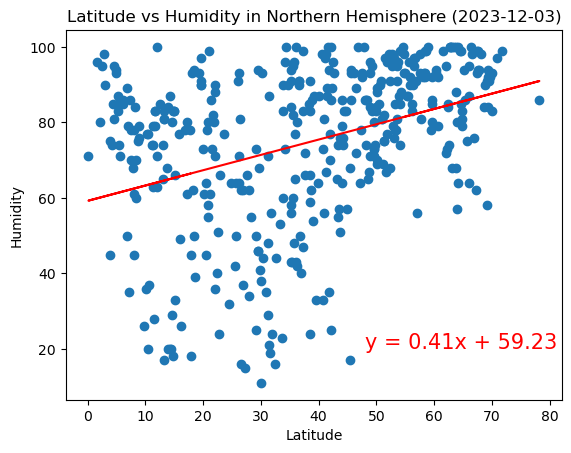

In [94]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], xy=(48,20),title='Latitude vs Humidity in Northern Hemisphere (2023-12-03)', x_label='Latitude', y_label='Humidity')

The r_value is: 0.043482822106497676


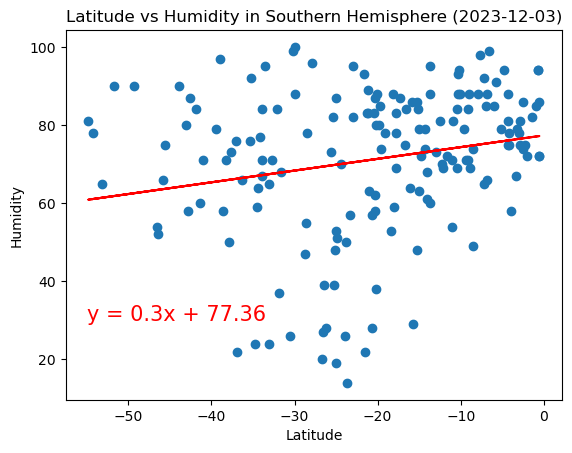

In [96]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], xy=(-55,30),title='Latitude vs Humidity in Southern Hemisphere (2023-12-03)', x_label='Latitude', y_label='Humidity')

**Discussion about the linear relationship:** In both the northern and southern hemispheres, the humidity seems to be increasing as the latitude increases. But the values are dispersed and the linear regression model is not that much of a good fit. The correlation coefficient is positive at 0.13 in the northern and 0.04 in the southern hemisphere which is not an indication of a strong linear relationship but just that the northern hemisphere has a little higher strength than the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r_value is: 0.03692924134738417


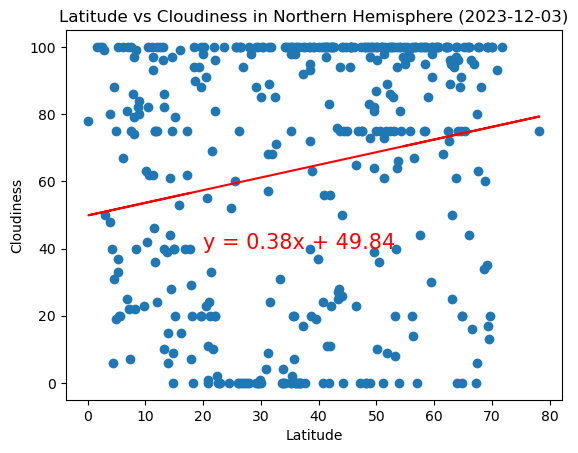

In [98]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], xy=(20,40),title='Latitude vs Cloudiness in Northern Hemisphere (2023-12-03)', x_label='Latitude', y_label='Cloudiness')

The r_value is: 0.006107130640441245


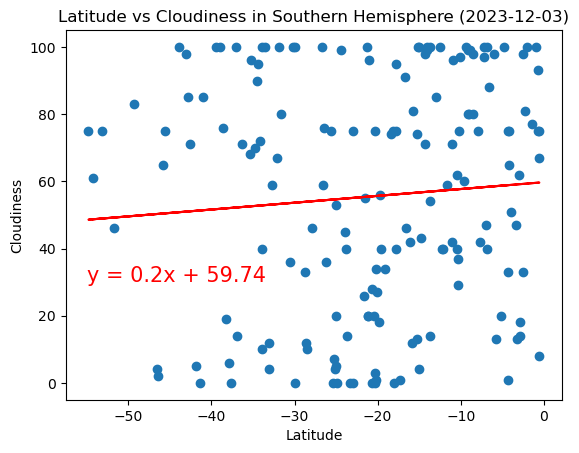

In [100]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], xy=(-55,30),title='Latitude vs Cloudiness in Southern Hemisphere (2023-12-03)', x_label='Latitude', y_label='Cloudiness')

**Discussion about the linear relationship:** Based on the linear regression plot, seems like as the latitude increases the cloudiness increases in both the northern and southern hemispheres, but the data points are too dispersed which does not indicate any strong relationship. The correlation coefficient even though positive is almost insignificant at 0.03 in the northern and 0.006 in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r_value is: 0.005034322383429525


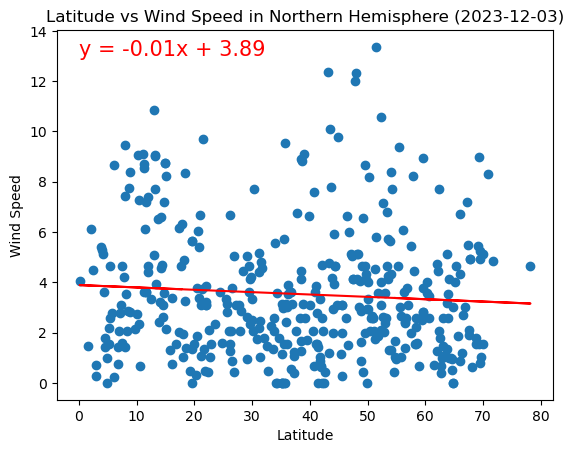

In [102]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], xy=(0,13),title='Latitude vs Wind Speed in Northern Hemisphere (2023-12-03)', x_label='Latitude', y_label='Wind Speed')

The r_value is: 0.05913688130615255


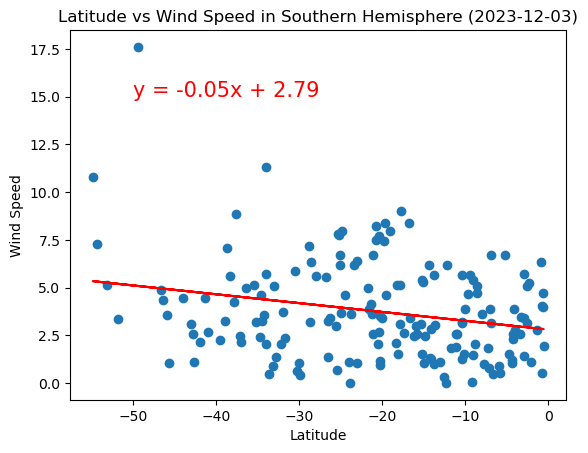

In [104]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], xy=(-50,15),title='Latitude vs Wind Speed in Southern Hemisphere (2023-12-03)', x_label='Latitude', y_label='Wind Speed')

**Discussion about the linear relationship:** As the latitude increases, the wind speed seem to be decreasing. But the values are a lot dispersed and does not indicate much of a relationship. The correlation coefficient is insignificant at 0.005 in the northern hemisphere and 0.059 in the southern hemisphere which is a little higher than the northern. It shows that there is no strong relationship between latitude and wind speed.